### Scripts to generate beautiful report figures 🎨

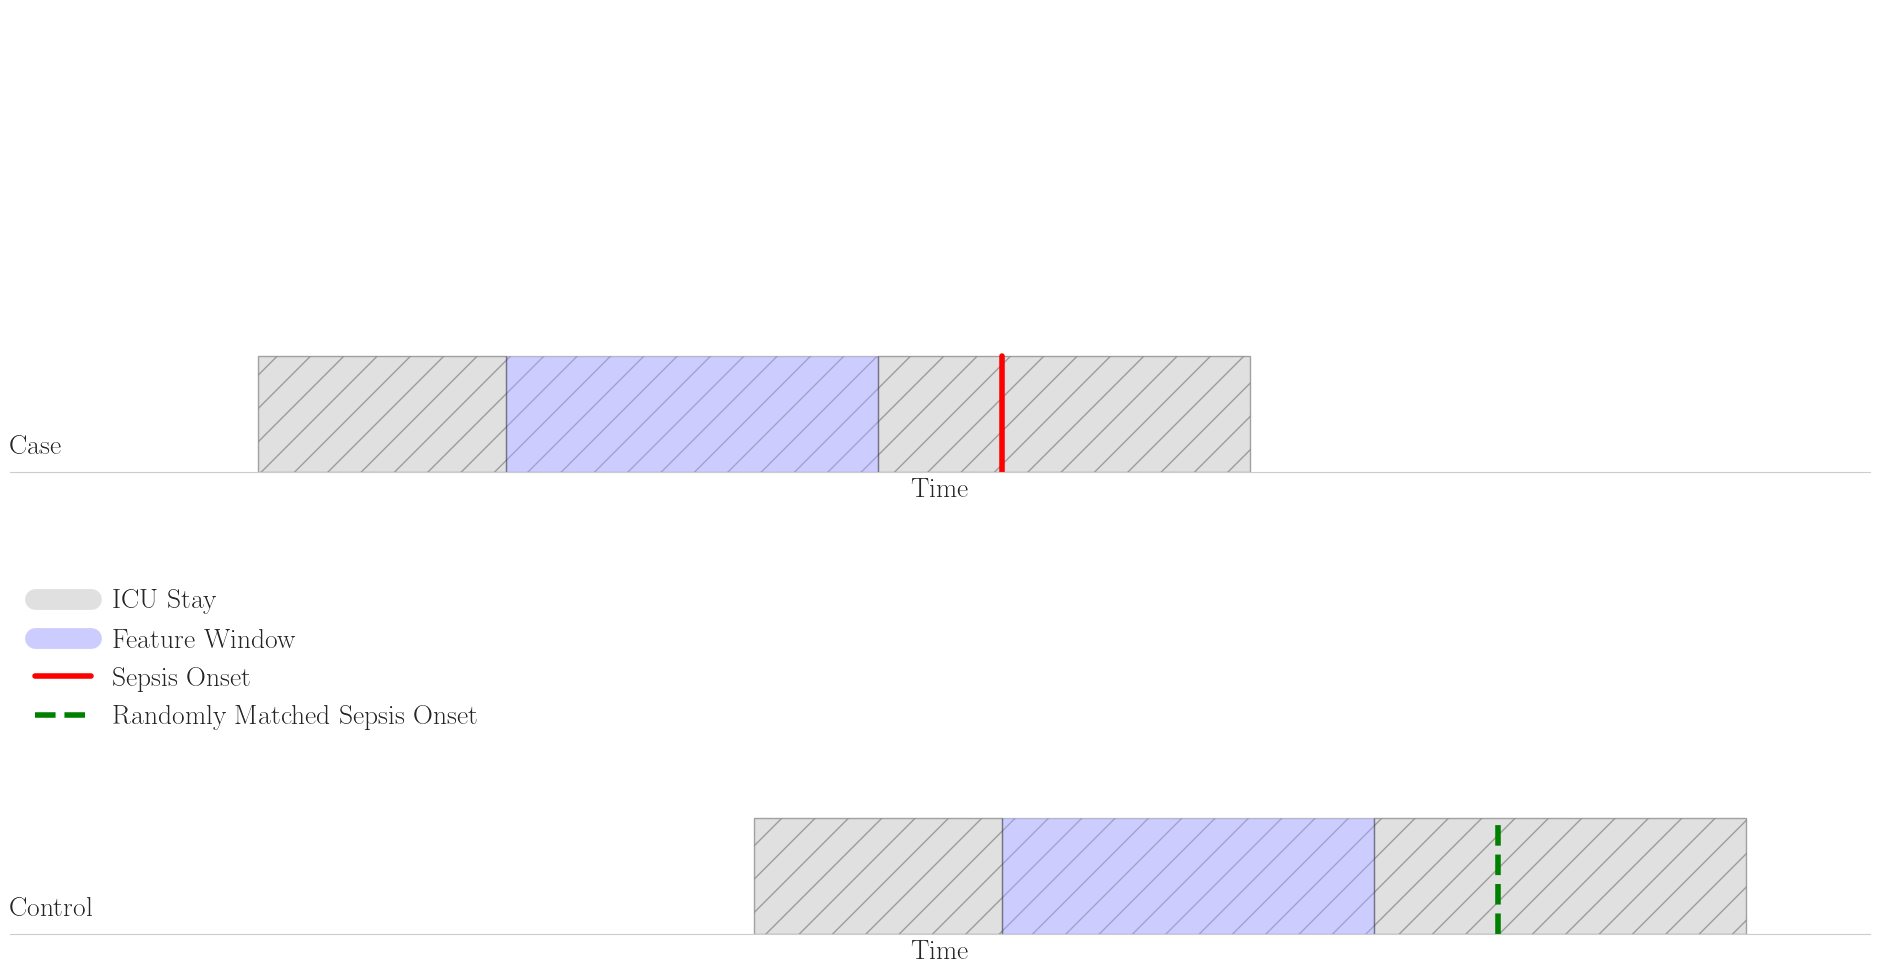

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

# Set Seaborn style
sns.set_style("whitegrid")

# Use Computer Modern Roman font
rc('font', **{'family': 'serif', 'serif': ['Computer Modern Roman']})
rc('text', usetex=True)

Y_MAX = .25
X_LIM = 30
FONTSIZE = 20

def plot_subplot(ICU_ADMISSION, ICU_DISCHARGE, SEPSIS_ONSET, FEATURE_WINDOW_START, FEATURE_WINDOW_END, sepsis_color, linestyle, label, name):
    plt.xlim(0, X_LIM)
    plt.ylim(0, .25)
    
    FEATURE_WINDOW_END = ICU_ADMISSION + SEPSIS_ONSET - 2
    FEATURE_WINDOW_START = FEATURE_WINDOW_END - 6
    
    plt.axvspan(ICU_ADMISSION, FEATURE_WINDOW_START, facecolor='lightgrey', alpha=0.7, ymin=0, ymax=Y_MAX, hatch="/", edgecolor="grey")
    plt.axvspan(FEATURE_WINDOW_END, ICU_DISCHARGE, facecolor='lightgrey', alpha=0.7, ymin=0, ymax=Y_MAX, hatch="/", edgecolor="grey")
    plt.axvspan(FEATURE_WINDOW_START, FEATURE_WINDOW_END, facecolor='blue', alpha=0.2, ymin=0, ymax=Y_MAX, hatch="/", edgecolor="black")
    plt.axvline(x=ICU_ADMISSION + SEPSIS_ONSET, color=sepsis_color, linestyle=linestyle, ymax=Y_MAX, lw=4)
    plt.text(0, 0.01, name, fontsize=FONTSIZE)
    plt.xticks([]) # Removing x-axis ticks
    plt.yticks([]) # Removing y-axis ticks
    plt.ylabel('') # Removing y-axis label
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)

plt.subplot(2, 1, 1, facecolor="none")
plot_subplot(4, 20, 12, 10, 16, 'red', '-', "Sepsis Onset", "Case")
plt.xlabel('Time', fontsize=FONTSIZE)

plt.subplot(2, 1, 2, facecolor="none")
plot_subplot(12, 28, 12, 10, 16, 'green', '--', "Randomly Matched Sepsis Onset", "Control")
plt.xlabel('Time', fontsize=FONTSIZE)

# Add shared legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='lightgrey', lw=15, alpha=0.7, label='ICU Stay'),
                   Line2D([0], [0], color='blue', lw=15, alpha=0.2, label='Feature Window'),
                   Line2D([0], [0], color='red', lw=4, linestyle='-', label='Sepsis Onset'),
                   Line2D([0], [0], color='green', lw=4, linestyle='--', label='Randomly Matched Sepsis Onset'),
                   ]
plt.legend(handles=legend_elements, loc="upper left", fontsize=FONTSIZE, bbox_to_anchor=(0, .8), frameon=False)
plt.subplots_adjust(hspace=0) # You can change 0.1 to any value to control the spacing
plt.gcf().set_size_inches(24, 12)
plt.savefig('figures/onset.pdf', bbox_inches='tight')
plt.savefig('figures/onset.png', bbox_inches='tight')
plt.savefig('figures/onset.svg', bbox_inches='tight')
plt.show()


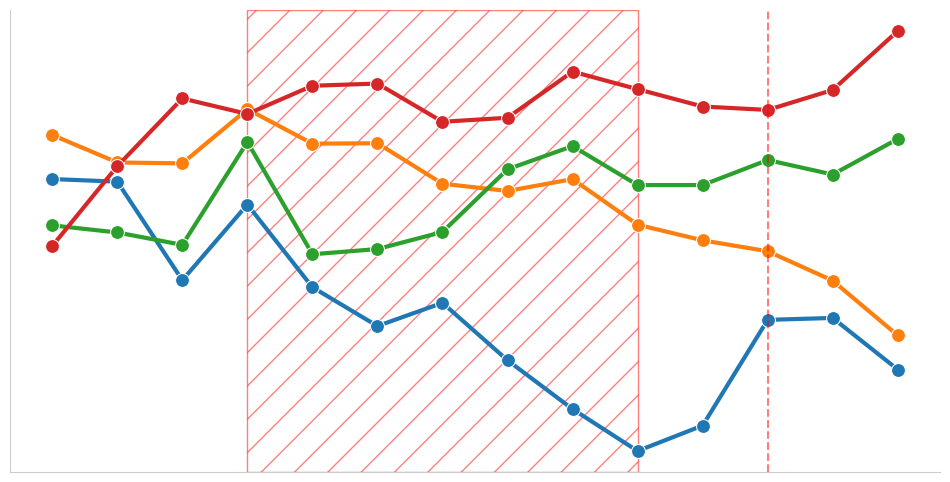

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set_style("whitegrid")

RANDOM_SEED = 2

N_POINTS = 14
START_VSPAN = 3
END_VSPAN = 9
START_VLINE = END_VSPAN + 2
LINEWIDTH = 3
MARKERSIZE = 10

# Creating simple data with 20 values
np.random.seed(RANDOM_SEED)
data = {
    'Series_1': np.random.randn(N_POINTS).cumsum(),
    'Series_2': np.random.randn(N_POINTS).cumsum(),
    'Series_3': np.random.randn(N_POINTS).cumsum(),
    'Series_4': np.random.randn(N_POINTS).cumsum()
}
df = pd.DataFrame(data)

# Melting the DataFrame
df_melted = df.reset_index().melt('index', var_name='a', value_name='b')

# Plotting the four time series
plt.figure(figsize=(12, 6))
sns.lineplot(x='index', y='b', hue='a', data=df_melted, marker='o', legend=False, linewidth=LINEWIDTH, markersize=MARKERSIZE)
plt.xticks([]) # Removing x-axis ticks
plt.yticks([]) # Removing y-axis ticks
plt.xlabel('') # Removing x-axis label
plt.ylabel('') # Removing y-axis label
plt.axvspan(START_VSPAN, END_VSPAN, facecolor='white', hatch="/", alpha=0.5, edgecolor="red") # Adding colored block
plt.axvline(START_VLINE, color='red', linestyle='--', alpha=0.5) # Adding vertical line
plt.gca().spines['top'].set_visible(False) # Removing top border
plt.gca().spines['right'].set_visible(False) # Removing right border
plt.savefig('figures/plot.pdf', bbox_inches='tight')
plt.show()